SportsStats (Olympics Dataset - 120 years of data)

SportsStats is a sports analysis firm partnering with local news
and elite personal trainers to provide “interesting” insights to help 
their partners.  Insights could be patterns/trends highlighting certain
groups/events/countries, etc.
for the purpose of developing a news story or discovering key health insights.

the goal of this project is to explore the data and find the factors that could controls the gaining medals 

In [3]:
import pandas as pd
import pandasql as p_sql
import xtarfile as tarfile
import datetime  as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
psqldf=lambda q: p_sql.sqldf(q,globals())

In [4]:
events1=pd.read_csv('sport_database/athlete_events.csv')
events=events1[events1.Year>1960]

In [5]:
regions=pd.read_csv('sport_database/noc_regions.csv')

In [6]:
double_country=regions.region.value_counts()[regions.region.value_counts()!=1].index.to_list();
dd=[[regions[regions.region==country].NOC.to_list() ,[country]] for country in double_country];
[events.Team.where(~events.NOC.isin(ele),other=country,inplace=True) for  i in range(len(dd)) for ele,country in zip(dd[i],dd[i][1])];

C:\Users\ryass\anaconda3\lib\site-packages\pandas\core\generic.py:9287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast


In [7]:
events.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN


Grouping by seseaon and Teams 

In [5]:
NOC_medal_winter=events[events.Season=='Winter'].groupby(['Team']).agg({'Medal':["count"]}).sort_values(by=[('Medal','count')],ascending=False).head(10).index.to_list()

In [6]:
NOC_medal_summer=events[events.Season=='Summer'].groupby(['Team']).agg({'Medal':["count"]}).sort_values(by=[('Medal','count')],ascending=False).head(10).index.to_list()

In [7]:
print(NOC_medal_summer,NOC_medal_winter)

['United States', 'Russia', 'Germany', 'Australia', 'China', 'Great Britain', 'Italy', 'Japan', 'France', 'Hungary'] ['Russia', 'Germany', 'Canada', 'United States', 'Finland', 'Norway', 'Sweden', 'Czech Republic', 'Austria', 'Italy']


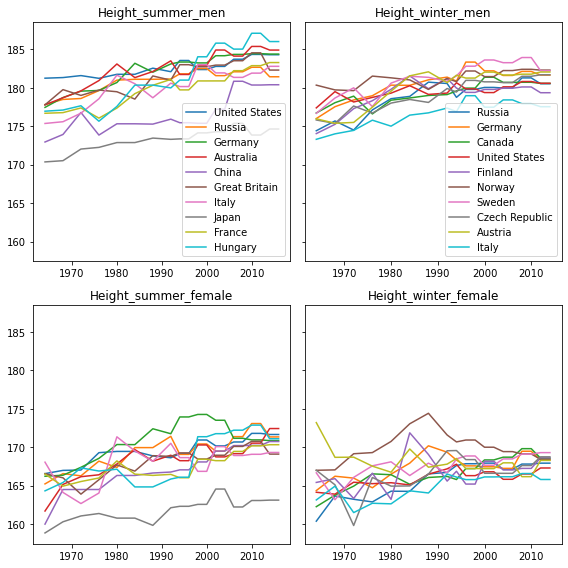

In [8]:
fig1,ax=plt.subplots(2,2,sharey='all')
fig1.set_size_inches(8,8)

Height_summer_men=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Height'].unstack().unstack().unstack()[('mean','Summer','M')].T[NOC_medal_summer]#.plot(ax=ax4[0,0])
Height_winter_men=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Height'].unstack().unstack().unstack()[('mean','Winter','M')].T[NOC_medal_winter]#.plot(ax=ax4[0,1])

Height_summer_female=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Height'].unstack().unstack().unstack()[('mean','Summer','F')].T[NOC_medal_summer]#.plot(ax=ax4[1,0])
Height_winter_female=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Height'].unstack().unstack().unstack()[('mean','Winter','F')].T[NOC_medal_winter]#.plot(ax=ax4[1,1])
ax[0,0].plot(Height_summer_men.fillna(method='bfill').astype('float64'));ax[0,0].set_title('Height_summer_men');
ax[0,1].plot(Height_winter_men.fillna(method='bfill').astype('float64'));ax[0,1].set_title('Height_winter_men');
ax[1,0].plot(Height_summer_female.fillna(method='bfill').astype('float64'));ax[1,0].set_title('Height_summer_female');
ax[1,1].plot(Height_winter_female.fillna(method='bfill').astype('float64'));ax[1,1].set_title('Height_winter_female');
ax[0,0].legend(Height_summer_men.columns.values,loc='best', bbox_transform = plt.gcf().transFigure)#bbox_to_anchor=(0.1, 0.5, 0.5, 0.5),
ax[0,1].legend(Height_winter_men.columns.values, loc='best',bbox_transform = plt.gcf().transFigure)#,bbox_to_anchor=(0.8, 0.5, 0.5, 0.5)
fig1.tight_layout()
fig1.savefig('sport_database/Height_m_f')

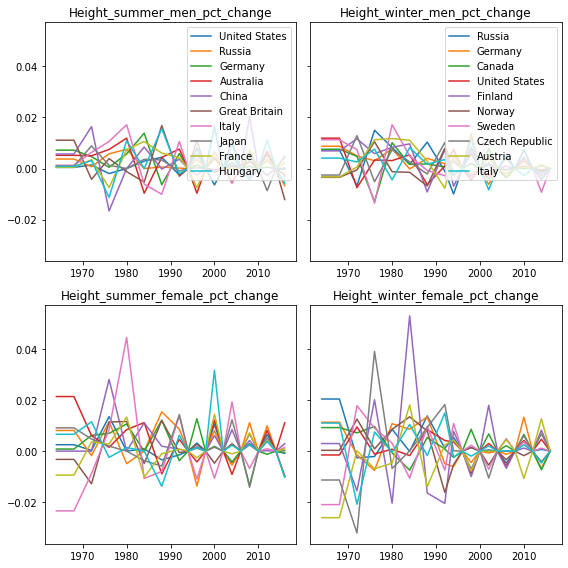

In [10]:
fig1,ax=plt.subplots(2,2,sharey='all')
fig1.set_size_inches(8,8)

Height_summer_men.pct_change()
Height_winter_men.pct_change()
Height_summer_female.pct_change()
Height_winter_female.pct_change()
ax[0,0].plot(Height_summer_men.pct_change().fillna(method='bfill').astype('float64'));ax[0,0].set_title('Height_summer_men_pct_change');
ax[0,1].plot(Height_winter_men.pct_change().fillna(method='bfill').astype('float64'));ax[0,1].set_title('Height_winter_men_pct_change');
ax[1,0].plot(Height_summer_female.pct_change().fillna(method='bfill').astype('float64'));ax[1,0].set_title('Height_summer_female_pct_change');
ax[1,1].plot(Height_winter_female.pct_change().fillna(method='bfill').astype('float64'));ax[1,1].set_title('Height_winter_female_pct_change');
ax[0,0].legend(Height_summer_men.columns.values,loc='upper right', bbox_transform = plt.gcf().transFigure)#bbox_to_anchor=(0.1, 0.5, 0.5, 0.5),
ax[0,1].legend(Height_winter_men.columns.values, loc='upper right',bbox_transform = plt.gcf().transFigure)#,bbox_to_anchor=(0.8, 0.5, 0.5, 0.5)
fig1.tight_layout()
fig1.savefig('sport_database/Height_m_f_pch_change')

** there is an increase in the female and male height over years. the rate of the height increase with year of women in summer game shows, italy and Hungary has the most peak at 1980 and 2000, respectively. while wintergame shows czech  and  finlland;1960 and 1990. 
for man there is no dramatic change in hight as much as women in winter and summer games.
**winter-game females have slitley lower height than the summer_game females while for men the diffenrce is more pronounced. 


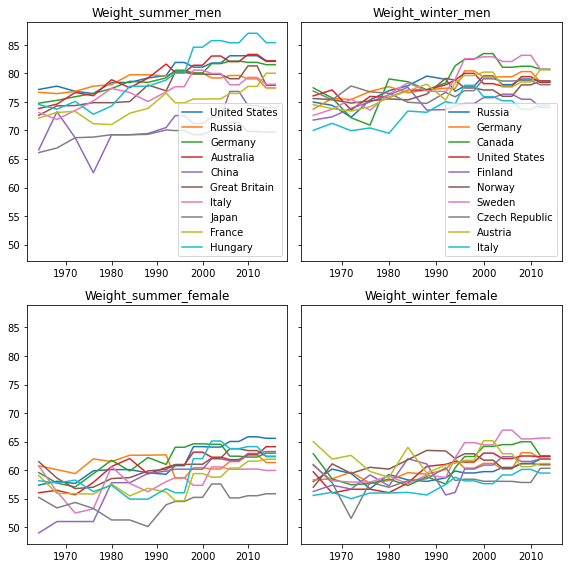

In [12]:
fig2,ax=plt.subplots(2,2,sharey='all')
fig2.set_size_inches(8,8)
Weight_summer_men=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Weight'].unstack().unstack().unstack()[('mean','Summer','M')].T[NOC_medal_summer]#.plot(ax=ax4[0,0])
Weight_winter_men=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Weight'].unstack().unstack().unstack()[('mean','Winter','M')].T[NOC_medal_winter]#.plot(ax=ax4[0,1])

Weight_summer_female=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Weight'].unstack().unstack().unstack()[('mean','Summer','F')].T[NOC_medal_summer]#.plot(ax=ax4[1,0])
Weight_winter_female=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Weight'].unstack().unstack().unstack()[('mean','Winter','F')].T[NOC_medal_winter]#.plot(ax=ax4[1,1])
ax[0,0].plot(Weight_summer_men.fillna(method='bfill').astype('float64'));ax[0,0].set_title('Weight_summer_men');
ax[0,1].plot(Weight_winter_men.fillna(method='bfill').astype('float64'));ax[0,1].set_title('Weight_winter_men');
ax[1,0].plot(Weight_summer_female.fillna(method='bfill').astype('float64'));ax[1,0].set_title('Weight_summer_female');
ax[1,1].plot(Weight_winter_female.fillna(method='bfill').astype('float64'));ax[1,1].set_title('Weight_winter_female');

ax[0,0].legend(Weight_summer_men.columns.values,loc='best', bbox_transform = plt.gcf().transFigure)#bbox_to_anchor=(0.1, 0.5, 0.5, 0.5),
ax[0,1].legend(Weight_winter_men.columns.values, loc='best',bbox_transform = plt.gcf().transFigure)#,bbox_to_anchor=(0.8, 0.5, 0.5, 0.5)


fig2.tight_layout()


fig2.savefig('sport_database/Weight_m_f')


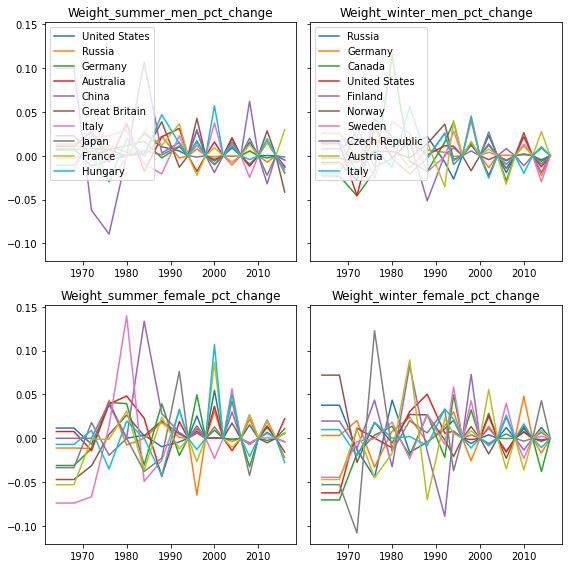

In [13]:

fig2,ax=plt.subplots(2,2,sharey='all')
fig2.set_size_inches(8,8)

ax[0,0].plot(Weight_summer_men.pct_change().fillna(method='bfill').astype('float64'));ax[0,0].set_title('Weight_summer_men_pct_change');
ax[0,1].plot(Weight_winter_men.pct_change().fillna(method='bfill').astype('float64'));ax[0,1].set_title('Weight_winter_men_pct_change');
ax[1,0].plot(Weight_summer_female.pct_change().fillna(method='bfill').astype('float64'));ax[1,0].set_title('Weight_summer_female_pct_change');
ax[1,1].plot(Weight_winter_female.pct_change().fillna(method='bfill').astype('float64'));ax[1,1].set_title('Weight_winter_female_pct_change');

ax[0,0].legend(Weight_summer_men.columns.values,loc='best', bbox_transform = plt.gcf().transFigure)#bbox_to_anchor=(0.1, 0.5, 0.5, 0.5),
ax[0,1].legend(Weight_winter_men.columns.values, loc='best',bbox_transform = plt.gcf().transFigure)#,bbox_to_anchor=(0.8, 0.5, 0.5, 0.5)


fig2.tight_layout()


fig2.savefig('sport_database/Weight_m_f')


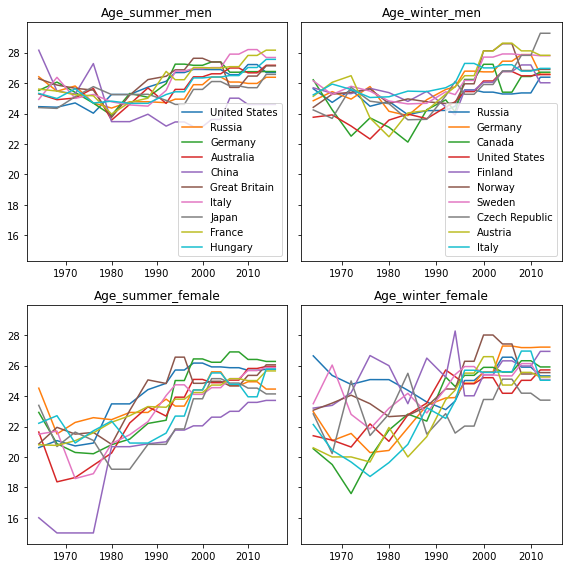

In [14]:

fig3,ax=plt.subplots(2,2,sharey='all')
fig3.set_size_inches(8,8)
Age_summer_men=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Age'].unstack().unstack().unstack()[('mean','Summer','M')].T[NOC_medal_summer]#.plot(ax=ax4[0,0])
Age_winter_men=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Age'].unstack().unstack().unstack()[('mean','Winter','M')].T[NOC_medal_winter]#.plot(ax=ax4[0,1])

Age_summer_female=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Age'].unstack().unstack().unstack()[('mean','Summer','F')].T[NOC_medal_summer]#.plot(ax=ax4[1,0])
Age_winter_female=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Age'].unstack().unstack().unstack()[('mean','Winter','F')].T[NOC_medal_winter]#.plot(ax=ax4[1,1])

ax[0,0].plot(Age_summer_men.fillna(method='bfill').astype('float64'));ax[0,0].set_title('Age_summer_men');
ax[0,1].plot(Age_winter_men.fillna(method='bfill').astype('float64'));ax[0,1].set_title('Age_winter_men');
ax[1,0].plot(Age_summer_female.fillna(method='bfill').astype('float64'));ax[1,0].set_title('Age_summer_female');
ax[1,1].plot(Age_winter_female.fillna(method='bfill').astype('float64'));ax[1,1].set_title('Age_winter_female');

ax[0,0].legend(Age_summer_men.columns.values,loc='best', bbox_transform = plt.gcf().transFigure)#bbox_to_anchor=(0.1, 0.5, 0.5, 0.5),
ax[0,1].legend(Age_winter_men.columns.values, loc='best',bbox_transform = plt.gcf().transFigure)#,bbox_to_anchor=(0.8, 0.5, 0.5, 0.5)


fig3.tight_layout()
fig3.savefig('sport_database/Age_m_f')


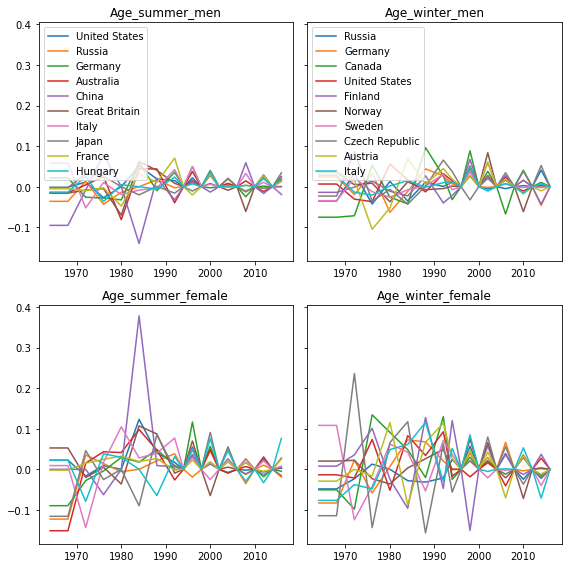

In [15]:

fig3,ax=plt.subplots(2,2,sharey='all')
fig3.set_size_inches(8,8)

ax[0,0].plot(Age_summer_men.pct_change().fillna(method='bfill').astype('float64'));ax[0,0].set_title('Age_summer_men');
ax[0,1].plot(Age_winter_men.pct_change().fillna(method='bfill').astype('float64'));ax[0,1].set_title('Age_winter_men');
ax[1,0].plot(Age_summer_female.pct_change().fillna(method='bfill').astype('float64'));ax[1,0].set_title('Age_summer_female');
ax[1,1].plot(Age_winter_female.pct_change().fillna(method='bfill').astype('float64'));ax[1,1].set_title('Age_winter_female');

ax[0,0].legend(Age_summer_men.columns.values,loc='best', bbox_transform = plt.gcf().transFigure)#bbox_to_anchor=(0.1, 0.5, 0.5, 0.5),
ax[0,1].legend(Age_winter_men.columns.values, loc='best',bbox_transform = plt.gcf().transFigure)#,bbox_to_anchor=(0.8, 0.5, 0.5, 0.5)


fig3.tight_layout()
fig3.savefig('sport_database/Age_m_f_pct')


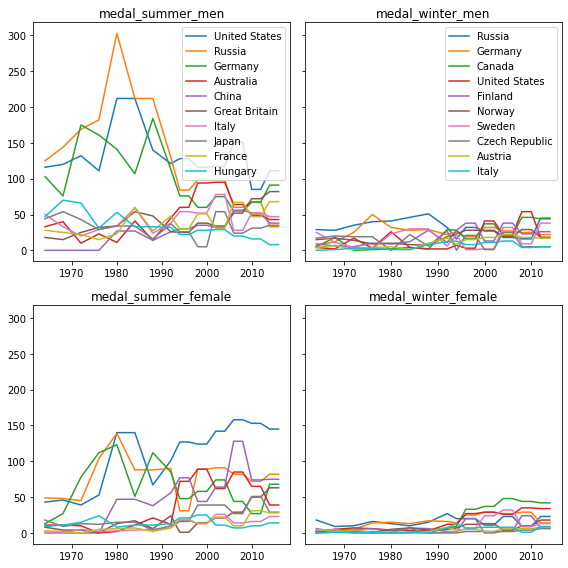

In [19]:

fig4,ax=plt.subplots(2,2,sharey='all')
fig4.set_size_inches(8,8)
medal_summer_men=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Medal'].unstack().unstack().unstack()[('count','Summer','M')].T[NOC_medal_summer]#.plot(ax=ax4[0,0])
medal_winter_men=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Medal'].unstack().unstack().unstack()[('count','Winter','M')].T[NOC_medal_winter]#.plot(ax=ax4[0,1])

medal_summer_female=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Medal'].unstack().unstack().unstack()[('count','Summer','F')].T[NOC_medal_summer]#.plot(ax=ax4[1,0])
medal_winter_female=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})['Medal'].unstack().unstack().unstack()[('count','Winter','F')].T[NOC_medal_winter]#.plot(ax=ax4[1,1])


ax[0,0].plot(medal_summer_men.fillna(method='bfill').astype('float64'));ax[0,0].set_title('medal_summer_men');
ax[0,1].plot(medal_winter_men.fillna(method='bfill').astype('float64'));ax[0,1].set_title('medal_winter_men');
ax[1,0].plot(medal_summer_female.fillna(method='bfill').astype('float64'));ax[1,0].set_title('medal_summer_female');
ax[1,1].plot(medal_winter_female.fillna(method='bfill').astype('float64'));ax[1,1].set_title('medal_winter_female');

ax[0,0].legend(medal_summer_men.columns.values,loc='best', bbox_transform = plt.gcf().transFigure)#bbox_to_anchor=(0.1, 0.5, 0.5, 0.5),
ax[0,1].legend(medal_winter_men.columns.values, loc='best',bbox_transform = plt.gcf().transFigure)#,bbox_to_anchor=(0.8, 0.5, 0.5, 0.5)

fig4.tight_layout()
fig4.savefig('sport_database/medal_counts.png')


The standard deviation each of Age , weight,and height as indicator of how widely any of these aspects are dispersed from the averaged value.

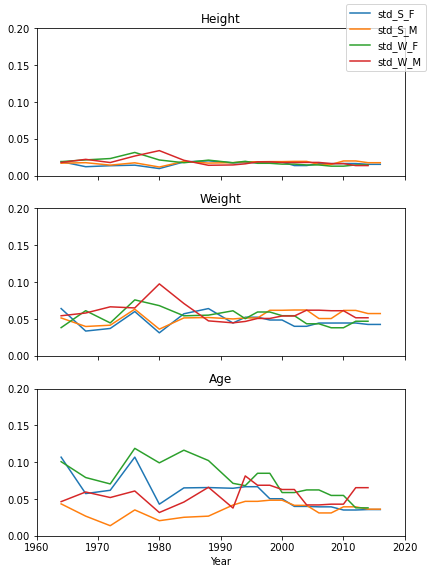

In [17]:
fig,ax=plt.subplots(3,1,sharex=True,sharey=True)
fig.set_size_inches(6,8)
# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (1960, 2020)
custom_ylim = (0,0.2)

# Setting the values for all axes.
plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
df=events.groupby(['Team','Year','Sex','Season']).agg({'Weight':["mean"],'Height':["mean"],'Age':["mean"],'Medal':["count"]})
std_H_S_F=df['Height'].unstack().unstack().unstack()[('mean','Summer','F')].T[NOC_medal_summer].std(axis=1).div(df['Height'].unstack().unstack().unstack()[('mean','Summer','F')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[0],legend=False,title='Height',sharey=True)#.plot(ax=ax4[1,0])

std_H_S_M=df['Height'].unstack().unstack().unstack()[('mean','Summer','M')].T[NOC_medal_summer].std(axis=1).div(df['Height'].unstack().unstack().unstack()[('mean','Summer','M')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[0],legend=False,sharey=True,sharex=True)#.plot(ax=ax4[1,0])

std_H_W_F=df['Height'].unstack().unstack().unstack()[('mean','Winter','F')].T[NOC_medal_summer].std(axis=1).div(df['Height'].unstack().unstack().unstack()[('mean','Winter','F')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[0],legend=False,sharey=True,sharex=True)#.plot(ax=ax4[1,0])
std_H_W_M=df['Height'].unstack().unstack().unstack()[('mean','Winter','M')].T[NOC_medal_summer].std(axis=1).div(df['Height'].unstack().unstack().unstack()[('mean','Winter','M')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[0],legend=False,sharey=True,sharex=True)#.plot(ax=ax4[1,0])

std_W_S_F=df['Weight'].unstack().unstack().unstack()[('mean','Summer','F')].T[NOC_medal_summer].std(axis=1).div(df['Weight'].unstack().unstack().unstack()[('mean','Summer','F')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[1],legend=False,title='Weight',sharey=True)#.plot(ax=ax4[1,0])
std_W_S_M=df['Weight'].unstack().unstack().unstack()[('mean','Summer','M')].T[NOC_medal_summer].std(axis=1).div(df['Weight'].unstack().unstack().unstack()[('mean','Summer','M')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[1],legend=False,sharey=True,sharex=True)#.plot(ax=ax4[1,0])
std_W_W_F=df['Weight'].unstack().unstack().unstack()[('mean','Winter','F')].T[NOC_medal_summer].std(axis=1).div(df['Weight'].unstack().unstack().unstack()[('mean','Winter','F')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[1],legend=False,sharey=True,sharex=True)#.plot(ax=ax4[1,0])
std_W_W_M=df['Weight'].unstack().unstack().unstack()[('mean','Winter','M')].T[NOC_medal_summer].std(axis=1).div(df['Weight'].unstack().unstack().unstack()[('mean','Winter','M')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[1],legend=False,sharey=True,sharex=True)#.plot(ax=ax4[1,0])

std_A_S_F=df['Age'].unstack().unstack().unstack()[('mean','Summer','F')].T[NOC_medal_summer].std(axis=1).div(df['Age'].unstack().unstack().unstack()[('mean','Summer','F')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[2],legend=False,title='Age',sharey=True)#.plot(ax=ax4[1,0])
std_A_S_M=df['Age'].unstack().unstack().unstack()[('mean','Summer','M')].T[NOC_medal_summer].std(axis=1).div(df['Age'].unstack().unstack().unstack()[('mean','Summer','M')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[2],legend=False,sharey=True,sharex=True)#.plot(ax=ax4[1,0])
std_A_W_F=df['Age'].unstack().unstack().unstack()[('mean','Winter','F')].T[NOC_medal_summer].std(axis=1).div(df['Age'].unstack().unstack().unstack()[('mean','Winter','F')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[2],legend=False,sharey=True,sharex=True)#.plot(ax=ax4[1,0])
std_A_W_M=df['Age'].unstack().unstack().unstack()[('mean','Winter','M')].T[NOC_medal_summer].std(axis=1).div(df['Age'].unstack().unstack().unstack()[('mean','Winter','M')].T[NOC_medal_summer].mean(axis=1)).fillna(method='bfill').plot(ax=ax[2],legend=False,sharey=True,sharex=True)#.plot(ax=ax4[1,0])


fig.legend(["std_S_F", "std_S_M","std_W_F","std_W_M"]);
fig.tight_layout()
fig.savefig('sport_database/std_all.png')

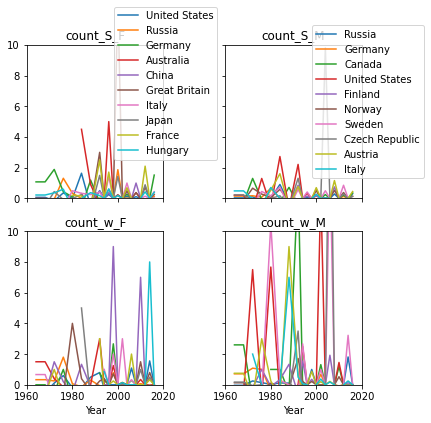

In [20]:
fig,ax=plt.subplots(2,2,sharex=True,sharey=True);
# Defining custom 'xlim' and 'ylim' values.
custom_xlim = (1960, 2020)
custom_ylim = (0,10)
fig.set_size_inches(6,6)
plt.setp(ax, xlim=custom_xlim, ylim=custom_ylim)
count_S_F=df['Medal'].unstack().unstack().unstack()[('count','Summer','F')].T[NOC_medal_summer].pct_change().fillna(method='bfill').plot(ax=ax[0,0],legend=False,title='count_S_F',sharey=True)#.plot(ax=ax4[1,0])
count_S_M=df['Medal'].unstack().unstack().unstack()[('count','Summer','M')].T[NOC_medal_summer].pct_change().fillna(method='bfill').plot(ax=ax[0,1],legend=False,title='count_S_M',sharey=True,sharex=True)#.plot(ax=ax4[1,0])
count__W_F=df['Medal'].unstack().unstack().unstack()[('count','Winter','F')].T[NOC_medal_winter].pct_change().fillna(method='bfill').plot(ax=ax[1,0],legend=False,title='count_w_F',sharey=True,sharex=True)#.plot(ax=ax4[1,0])
count_W_M=df['Medal'].unstack().unstack().unstack()[('count','Winter','M')].T[NOC_medal_winter].pct_change().fillna(method='bfill').plot(ax=ax[1,1],legend=False,title='count_w_M',sharey=True,sharex=True)#.plot(ax=ax4[1,0])
ax[0,0].legend(medal_summer_men.columns.values,loc='best',bbox_to_anchor=(0.6, 0.5, 0.5, 0.5)),
ax[0,1].legend(medal_winter_men.columns.values, loc='best',bbox_to_anchor=(0.6, 0.1, 0.5, 0.5))
# bbox_transform = plt.gcf().transFigure 
#"std_S_F", "std_S_M","std_W_F","std_W_M"
fig.tight_layout()
fig.savefig('sport_database/increazing_rate.png')

In [21]:
gender_summer=psqldf(''' SELECT ev.NOC,ev.Year,ev.medal_count,ev.Female,ev.Male,cast((ev.Female) as float)/cast((ev.Male) as float) as FtoM_ratio,
                        (ev.Female+ev.Male) as F_M_total,re.region as country

           FROM( SELECT trim(NOC) as NOC,Year , count(medal) as medal_count,

                       sum( case  when sex='F' then 1 else 0  end )as Female ,
                       sum( case  when sex='M' then 1  else 0  end ) as Male 
                       
                
                  FROM events Where trim(Season)='Summer' Group by NOC,Year) as ev inner join regions as re on ev.NOC=re.NOC
                   ''')

In [22]:
gender_winter=psqldf(''' SELECT ev.NOC,ev.Year,ev.medal_count,ev.Female,ev.Male,cast((ev.Female) as float)/cast((ev.Male) as float) as FtoM_ratio,
                        (ev.Female+ev.Male) as F_M_total,
                        re.region as country

           FROM( SELECT trim(NOC) as NOC,Year , count(medal) as medal_count,

                       sum( case  when sex='F' then 1 else 0  end )as Female ,
                       sum( case  when sex='M' then 1  else 0  end ) as Male 
                       
                
                  FROM events Where trim(Season)='Winter' Group by NOC,Year) as ev inner join regions as re on ev.NOC=re.NOC
                   ''')

In [23]:
print (psqldf(''' select count(*) from gender_summer'''))
print (psqldf(''' select count(*) from gender_winter'''))
FtoM_winter=psqldf(''' select * from gender_winter where FtoM_ratio >1 order by FtoM_ratio desc''')

   count(*)
0      2168
   count(*)
0       818


In [24]:
FtoM_summer=psqldf(''' select * from gender_summer where FtoM_ratio >1 order by FtoM_ratio desc ''')


In [35]:
FtoM_summer.head(2)

,NOC,Year,medal_count,Female,Male,FtoM_ratio,F_M_total,country
0,COD,1996,0,12,2,6.0,14,Democratic Republic of the Congo
1,MYA,2000,0,6,1,6.0,7,Myanmar


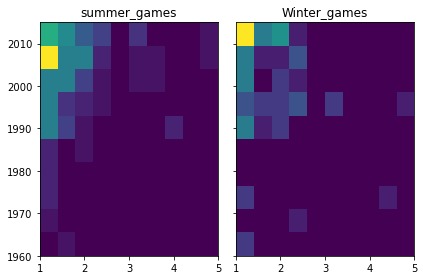

In [37]:
fig,(ax1,ax2)=plt.subplots(1,2,sharey=True,sharex=True)
ax1.hist2d(FtoM_summer.FtoM_ratio,FtoM_summer.Year,bins=[10,10],range=[[1, 5], [1960, 2015]],cmin=0,cmax=30)
ax1.set_title('summer_games')
#plt.colorbar()
ax2.hist2d(FtoM_winter.FtoM_ratio,FtoM_winter.Year,bins=[10,10],range=[[1, 5], [1960, 2015]],cmin=0,cmax=30)
ax2.set_title('Winter_games')
#plt.colorbar()
fig.tight_layout() 
fig.savefig('sport_database/2Dhist.png')


correlation the women to men ratio with medal number in summer games

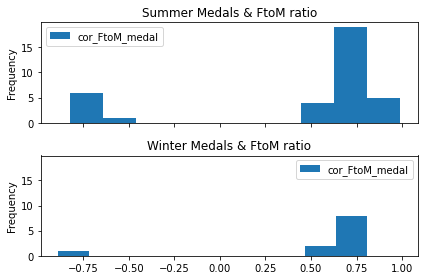

In [43]:
#correlation the women to men ratio with medal number in summer games
fig,(ax1,ax2)=plt.subplots(2,1,sharey=True,sharex=True)

corr={}

for name in gender_summer.NOC.unique():
    #print(name)
    NED=gender_summer[gender_summer['NOC']==name]
    correlation=NED[['medal_count','FtoM_ratio']].corr()
    corr[name]=correlation.iloc[0,1] #extract from corr matrix 


corrdf=pd.DataFrame.from_dict(corr,orient='index',columns=['cor_FtoM_medal'])
corrdf1=corrdf[((corrdf.cor_FtoM_medal>0.6)&(corrdf.cor_FtoM_medal<1))| ((corrdf.cor_FtoM_medal<-0.6)&(corrdf.cor_FtoM_medal>-1))]
#positive_corr=corrdf[(corrdf.cor_FtoM_medal>0.5) & (corrdf.cor_FtoM_medal<-0.5)]
#negative_corr=corrdf[corrdf.cor_FtoM_medal<-0.5]

corrdf1.sort_values(by='cor_FtoM_medal',ascending=False).plot.hist(ax=ax1,title='Summer Medals & FtoM ratio');
#correlation the women to men ratio with medal number in winter games
corr={}
for name in gender_winter.NOC.unique():
    #print(name)
    NED=gender_winter[gender_winter['NOC']==name]
    correlation=NED[['medal_count','FtoM_ratio']].corr()
    corr[name]=correlation.iloc[0,1]


corrdf=pd.DataFrame.from_dict(corr,orient='index',columns=['cor_FtoM_medal'])
corrdf2=corrdf[((corrdf.cor_FtoM_medal>0.6)&(corrdf.cor_FtoM_medal<1))| ((corrdf.cor_FtoM_medal<-0.6)&(corrdf.cor_FtoM_medal>-1))]
#positive_corr=corrdf[corrdf.cor_FtoM_medal>0.5]
#negative_corr=corrdf[corrdf.cor_FtoM_medal<-0.5]

corrdf2.sort_values(by='cor_FtoM_medal',ascending=False).plot.hist(ax=ax2,title='Winter Medals & FtoM ratio')

fig.tight_layout() 
fig.savefig('sport_database/correlation.png')


*It could be that the Female to Male ratio correlates positivley with higher medal number for the teams


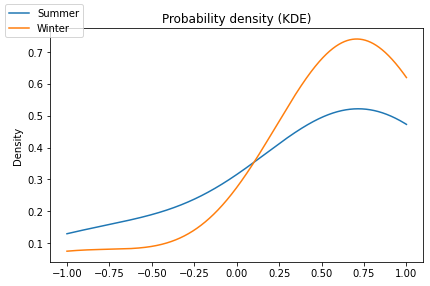

In [44]:
fig3,ax3=plt.subplots(1,1,sharey=True,sharex=True)
ind=np.linspace(-1,1,10000);
corrdf1.sort_values(by='cor_FtoM_medal',ascending=False).plot(kind='kde',ax=ax3,ind=ind,bw_method=1,title='Probability density (KDE)',legend=None)
corrdf2.sort_values(by='cor_FtoM_medal',ascending=False).plot.kde(ax=ax3,ind=ind,bw_method=1,legend=None);
fig3.tight_layout() 
fig3.legend(['Summer','Winter'],loc='upper left')
fig3.savefig('sport_database/propabilistic_density.png')


In [46]:
from sklearn import linear_model

summer games > 1996 ,slope= [1.13224444]
summer games < 1996 ,slope= [1.87177963]
winter games > 1996 ,slope= [1.3106406]
winter games< 1996 slope= [1.85679188]


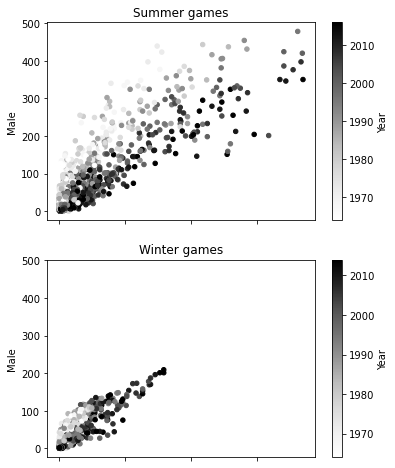

In [62]:
fig,(ax1,ax2)=plt.subplots(2,1,sharey=True,sharex=True)
fig.set_size_inches(6,8)
gender_summer[['Year','Female','Male']].plot.scatter(ax=ax1,x='Female',y='Male',c='Year',title='Summer games')
gender_winter[['Year','Female','Male']].plot.scatter(ax=ax2,x='Female',y='Male',c='Year',title='Winter games')
ax2.set_xlabel('female')
plt.savefig('sport_database/male_female.png')

year=1996
reg = linear_model.LinearRegression();
reg.fit(gender_summer[gender_summer.Year >=year]['Female'].values.reshape(-1, 1), gender_summer[gender_summer.Year >=year]['Male'].values);print('summer games >', year ,',slope=', reg.coef_)
reg.fit(gender_summer[gender_summer.Year <year]['Female'].values.reshape(-1, 1), gender_summer[gender_summer.Year <year]['Male'].values);print('summer games <', year ,',slope=', reg.coef_)


reg.fit(gender_winter[gender_winter.Year>=year]['Female'].values.reshape(-1, 1), gender_winter[gender_winter.Year>year]['Male'].values);print('winter games >', year ,',slope=', reg.coef_)
reg.fit(gender_winter[gender_winter.Year<year]['Female'].values.reshape(-1, 1), gender_winter[gender_winter.Year<year]['Male'].values);print('winter games<',year,'slope=',reg.coef_)

Example of  multi-output estimators¶

In [297]:
# compare algorithms
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
dataset1=events[['Sex', 'Age', 'Height', 'Weight', 'Team',
       'Season', 'Sport', 'Medal']].fillna('0')
LabelEncoder=LabelEncoder()
dataset1['Sex_cat']=LabelEncoder.fit_transform(dataset1['Sex'])
dataset1['Season_cat']=LabelEncoder.fit_transform(dataset1['Season'])
dataset1['Sport_cat']=LabelEncoder.fit_transform(dataset1['Sport'])
dataset1['Team_cat']=LabelEncoder.fit_transform(dataset1['Team'])
dataset1['Medal_cat']=LabelEncoder.fit_transform(dataset1['Medal'])
dataset=dataset1[['Sex_cat','Age', 'Height', 'Weight',
       'Season_cat', 'Sport_cat', 'Medal']]
#dataset.info()

In [298]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:6]
y = array[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [11]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
#models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []

In [12]:
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    

LR: 0.862500 (0.000025)
LDA: 0.862500 (0.000025)
KNN: 0.855676 (0.000580)


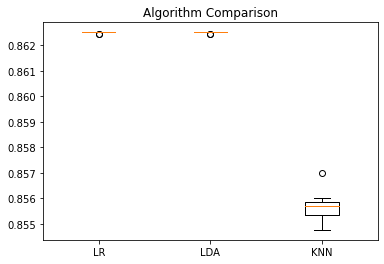

In [13]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

# Deep Neural network approach 

In [158]:
#Import required libraries 
import keras #library for neural network
import pandas as pd #loading data in table form  
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import normalize #machine learning algorithm library
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [159]:
%cd sport_database

[WinError 2] The system cannot find the file specified: 'sport_database'
D:\courses_edu\capbstone_sql\sport_database


In [502]:
events1=pd.read_csv('athlete_events.csv')
events=events1[events1.Year>1960]

In [503]:
regions=pd.read_csv('noc_regions.csv')

In [504]:
double_country=regions.region.value_counts()[regions.region.value_counts()!=1].index.to_list();
dd=[[regions[regions.region==country].NOC.to_list() ,[country]] for country in double_country];
[events.Team.where(~events.NOC.isin(ele),other=country,inplace=True) for  i in range(len(dd)) for ele,country in zip(dd[i],dd[i][1])];

C:\Users\ryass\anaconda3\lib\site-packages\pandas\core\generic.py:9287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cond, other, inplace, axis, level, errors=errors, try_cast=try_cast


In [505]:
events['R_BMI']=events['Height']**2/events['Weight']
events.Medal.fillna('Zero',inplace=True)

C:\Users\ryass\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ryass\anaconda3\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Body mass index (BMI) is a person’s weight in kilograms divided by the square of height in meters.

In [508]:
from sklearn.preprocessing import LabelEncoder
dataset1=events[['Sex', 'Age', 'Height', 'Weight','R_BMI', 'Team',
       'Season', 'Sport', 'Medal']]
LabelEncoder=LabelEncoder()
dataset1['Sex_cat']=LabelEncoder.fit_transform(dataset1['Sex'])
dataset1['Season_cat']=LabelEncoder.fit_transform(dataset1['Season'])
dataset1['Sport_cat']=LabelEncoder.fit_transform(dataset1['Sport'])
dataset1['Team_cat']=LabelEncoder.fit_transform(dataset1['Team'])
dataset1['Medal_cat']=LabelEncoder.fit_transform(dataset1['Medal'])

C:\Users\ryass\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\ryass\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ryass\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [509]:
dataset1['Weight'].dtype

dtype('float64')

In [510]:
dataset=dataset1[['Sex_cat','Age','R_BMI',
       'Season_cat', 'Medal']].dropna()

In [511]:
dataset.isnull().values.sum()

0

In [529]:
X=dataset.iloc[:,0:4].values
y=dataset.iloc[:,4].values

print("Shape of X",X.shape)
print("Shape of y",y.shape)
print("Examples of X\n",X[:3])
print("Examples of y\n",y[:3])

Shape of X (188046, 4)
Shape of y (188046,)
Examples of X
 [[  1.          24.         405.           0.        ]
 [  1.          23.         481.66666667   0.        ]
 [  0.          21.         417.37804878   1.        ]]
Examples of y
 ['Zero' 'Zero' 'Zero']


In [530]:
#X_normalized=normalize(X.astype('float'),axis=0)
#print("Examples of X_normalised\n",X_normalized[:3])

In [531]:
'''
80% -- train data
20% -- test data
'''
total_length=len(dataset)
train_length=int(0.8*total_length)
test_length=int(0.2*total_length)

X_train=X[:train_length]
X_test=X[train_length:]
y_train=y[:train_length]
y_test=y[train_length:]

print("Length of train set x:",X_train.shape[0],"y:",y_train.shape[0])
print("Length of test set x:",X_test.shape[0],"y:",y_test.shape[0])


Length of train set x: 150436 y: 150436
Length of test set x: 37610 y: 37610


In [532]:
#Neural network module
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout 
from keras.layers.normalization import BatchNormalization 
from keras.utils import np_utils


In [533]:
#Change the label to one hot vector
'''
[0]--->[1 0 0 0]
[1]--->[0 1 0 0]
[2]--->[0 0 1 0]
[3]--->[0 0 0 1]
'''

y_train=np_utils.to_categorical(LabelEncoder.fit_transform(y_train),num_classes=4)
y_test=np_utils.to_categorical(LabelEncoder.fit_transform(y_test),num_classes=4)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of y_train (150436, 4)
Shape of y_test (37610, 4)


In [525]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))
opt = keras.optimizers.Adam(learning_rate=0.02)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [396]:
model.summary();

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_34 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_35 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_9 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 4)                 1204      
Total params: 657,004
Trainable params: 657,004
Non-trainable params: 0
_________________________________________________________________


## Finding the LEARNING RATE 

Epoch 1/1
150436/150436 [==============================] - 68s 455us/step - loss: 1.1242 - accuracy: 0.8243


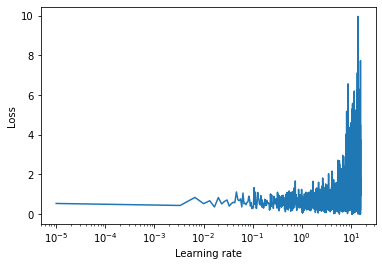

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 1000)              5000      
_________________________________________________________________
dense_38 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_39 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_10 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 4)                 1204      
Total params: 657,004
Trainable params: 657,004
Non-trainable params: 0
_________________________________________________________________


In [524]:
import Finding_the_optimal_learning_rate_range 
epoch_size=10
batch_size=1000
steps_per_epoch=np.ceil(epoch_size/batch_size)
lr_finder = Finding_the_optimal_learning_rate_range.LRFinder(min_lr=1e-5, max_lr=1e-2,steps_per_epoch=steps_per_epoch, epochs=3)

                                 
model.fit(X_train, y_train, callbacks=[lr_finder])
lr_finder.plot_loss()
model.summary()

* running the neural netwrok 

In [534]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=1000,epochs=10,verbose=1)

Train on 150436 samples, validate on 37610 samples
Epoch 1/10
150436/150436 [==============================] - 9s 60us/step - loss: 0.5551 - accuracy: 0.8603 - val_loss: 0.5898 - val_accuracy: 0.8473
Epoch 2/10
150436/150436 [==============================] - 9s 61us/step - loss: 0.5553 - accuracy: 0.8603 - val_loss: 0.5905 - val_accuracy: 0.8473
Epoch 3/10
150436/150436 [==============================] - 9s 61us/step - loss: 0.5549 - accuracy: 0.8603 - val_loss: 0.5908 - val_accuracy: 0.8473
Epoch 4/10
150436/150436 [==============================] - 10s 67us/step - loss: 0.5551 - accuracy: 0.8603 - val_loss: 0.5921 - val_accuracy: 0.8473
Epoch 5/10
150436/150436 [==============================] - 10s 69us/step - loss: 0.5545 - accuracy: 0.8603 - val_loss: 0.5930 - val_accuracy: 0.8473
Epoch 6/10
150436/150436 [==============================] - 10s 68us/step - loss: 0.5550 - accuracy: 0.8603 - val_loss: 0.5918 - val_accuracy: 0.8473
Epoch 7/10
150436/150436 [==========================

In [535]:
prediction=model.predict(X_test)
length=len(prediction)
y_label=np.argmax(y_test,axis=1)
predict_label=np.argmax(prediction,axis=1)

accuracy=np.sum(y_label==predict_label)/length * 100 
print("Accuracy of the dataset",accuracy )

Accuracy of the dataset 84.72746609944164


In [536]:
history_dict=history.history;
history.history;

Text(0, 0.5, 'Loss')

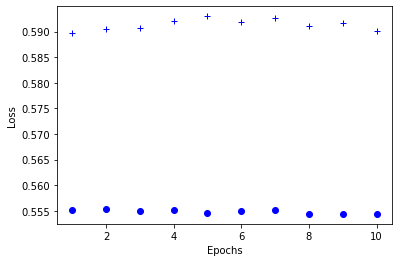

In [537]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# b+ is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

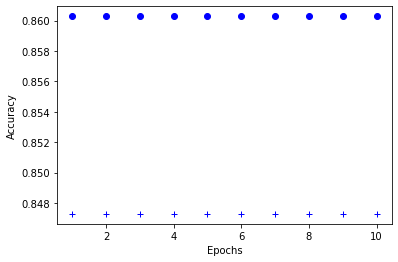

In [538]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')